# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
from cartopy import crs as ccrs
import simplekml
import fiona

# Reading KML files

In [2]:
# Providing work directory

work_dir = '../Data/nagpur_data/'

fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [3]:
south_ngp_gdf = gpd.read_file(work_dir + 'south_nagpur.kml', driver='KML')

In [4]:
east_ngp_gdf = gpd.read_file(work_dir + 'east_nagpur.kml', driver='KML')

# Plotting south_ngp_gdf DataFrame

<Axes: >

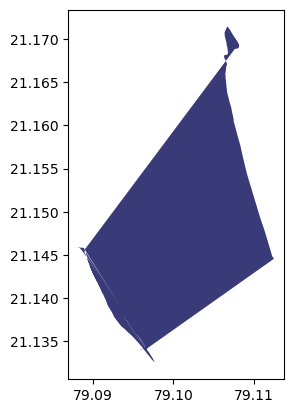

In [5]:
south_ngp_gdf.plot(cmap='tab20b')

# Plotting east_ngp_gdf DataFrame

<Axes: >

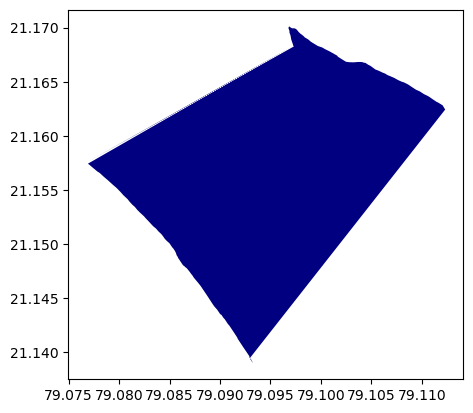

In [6]:
east_ngp_gdf.plot(cmap='jet')

# Using overlay function (how = "union")

<Axes: >

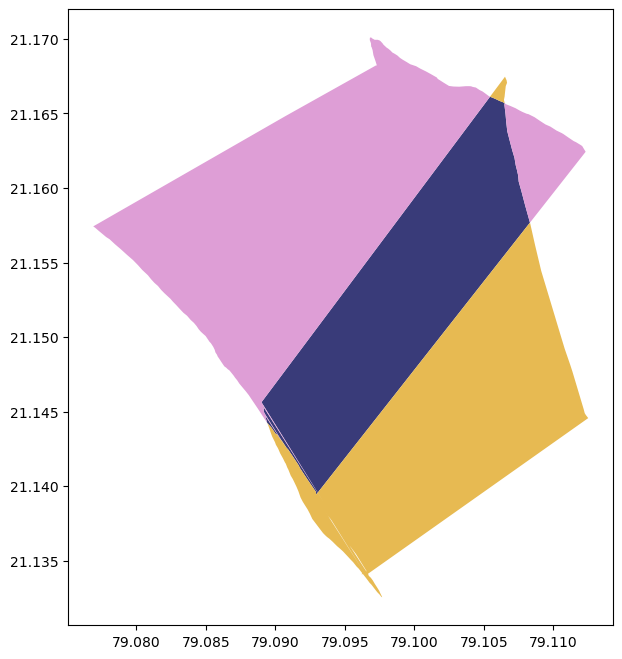

In [7]:
intersected_df = south_ngp_gdf.overlay(east_ngp_gdf, how="union")
intersected_df.plot(cmap='tab20b', figsize = (8,8), legend = True)

# Using overlay function (how = "intersection")

In [8]:
# intersected_df = south_ngp_gdf.overlay(east_ngp_gdf, how="intersection")
# intersected_df.plot(cmap='tab20b', figsize = (8,8), legend = True)

In [9]:
intersected_df

,Name_1,Description_1,Name_2,Description_2,geometry
0,south_nagpur,,east_nagpur,,"MULTIPOLYGON Z (((79.08901 21.14562 0.00000, 7..."
1,south_nagpur,,NaN,NaN,"MULTIPOLYGON Z (((79.09080 21.14254 0.00000, 7..."
2,NaN,NaN,east_nagpur,,"MULTIPOLYGON Z (((79.10661 21.16561 0.00000, 7..."


In [10]:
# Cartesian system (EPSG:3857)
# Cylindrical equal-area format with {'proj':'cea'}

# Converting crs to cea(Cylindrical equal-area format)

In [11]:
south_ngp_gdf['geometry_2'] = south_ngp_gdf['geometry'].to_crs({'proj':'cea'})

In [12]:
east_ngp_gdf['geometry_2'] = east_ngp_gdf['geometry'].to_crs({'proj':'cea'})

In [13]:
intersected_df['geometry_2'] = intersected_df['geometry'].to_crs({'proj':'cea'})

# Calculating Area

In [14]:
south_ngp_gdf['area'] = south_ngp_gdf['geometry_2'].area/10**6

In [15]:
east_ngp_gdf['area'] = east_ngp_gdf['geometry_2'].area/10**6

In [16]:
# area method give area in square meters that's why dividing it by 10**6

intersected_df['area'] = intersected_df['geometry_2'].area/10**6

# Adding total area

In [17]:
total_area = south_ngp_gdf['area'] + east_ngp_gdf['area']

# Calculating overlapping_area%

In [18]:
intersected_df['overlapping_area%'] = (intersected_df['area'] / total_area) * 100

In [19]:
intersected_df

,Name_1,Description_1,Name_2,Description_2,geometry,geometry_2,area,overlapping_area%
0,south_nagpur,,east_nagpur,,"MULTIPOLYGON Z (((79.08901 21.14562 0.00000, 7...",MULTIPOLYGON Z (((8804148.177 2286771.296 0.00...,2.135041,20.840903
1,south_nagpur,,NaN,NaN,"MULTIPOLYGON Z (((79.09080 21.14254 0.00000, 7...",MULTIPOLYGON Z (((8804347.324 2286453.107 0.00...,2.400480,NaN
2,NaN,NaN,east_nagpur,,"MULTIPOLYGON Z (((79.10661 21.16561 0.00000, 7...",MULTIPOLYGON Z (((8806107.472 2288836.738 0.00...,3.592271,NaN


In [26]:
intersected_df.explore()

<Axes: >

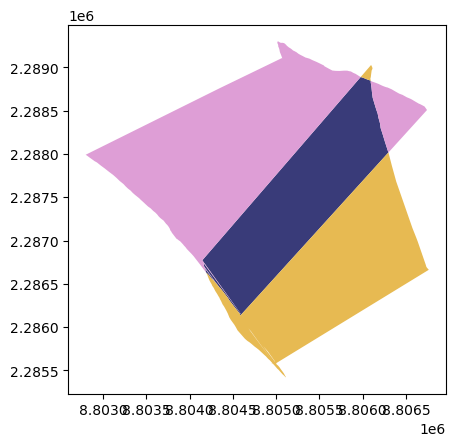

In [27]:
intersected_df['geometry_2'].plot(cmap='tab20b')